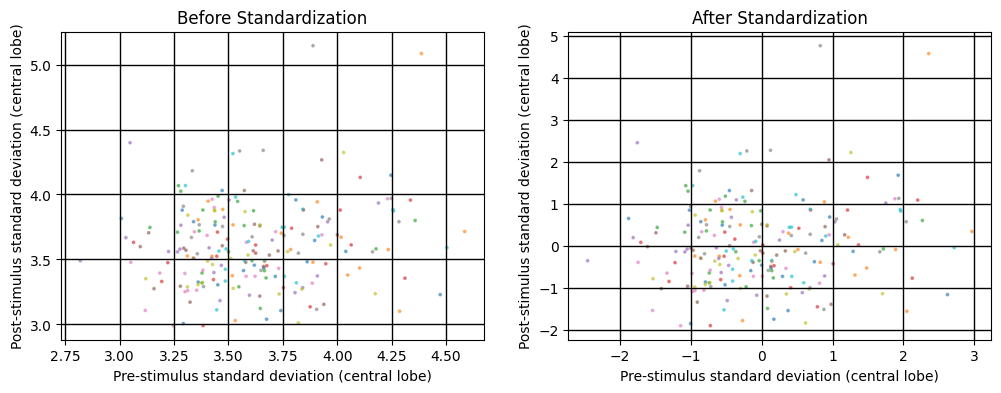

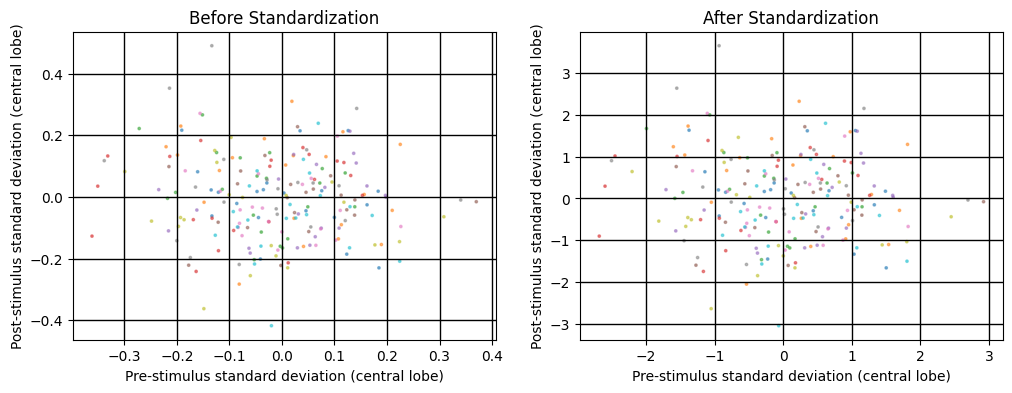

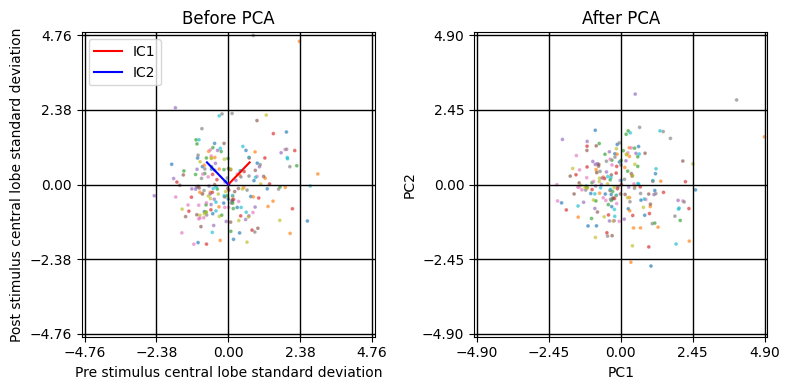

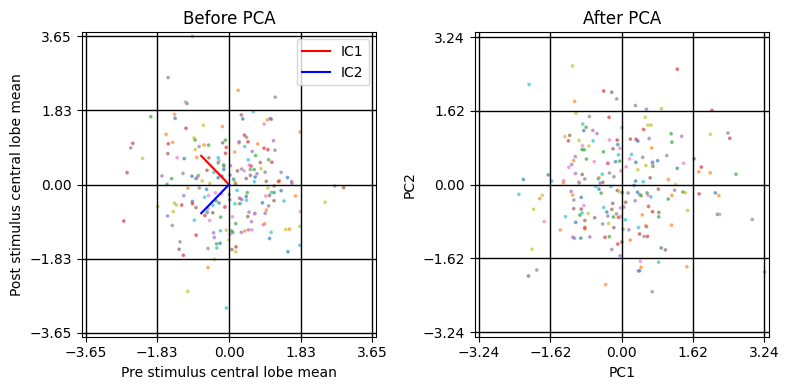

In [6]:
# PCA for the central LOBE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

filename = r'eeg_data.csv'    


# Reading the data - STEP 1

data = pd.read_csv(filename)    # reading the data
keys = data.keys()

# Data for the central lobe
pre_stimulus_mean_central = np.array(data[keys[5]]) 
post_stimulus_mean_central = np.array(data[keys[6]]) 
pre_stimulus_std_central = np.array(data[keys[7]]) 
post_stimulus_std_central = np.array(data[keys[8]]) 

# Standardize the data (to make sure all variables are trated equally)  - STEP 2
s_pre_stimulus_mean_central = (pre_stimulus_mean_central - np.mean(pre_stimulus_mean_central)) / np.std(pre_stimulus_mean_central)
s_post_stimulus_mean_central = (post_stimulus_mean_central - np.mean(post_stimulus_mean_central)) / np.std(post_stimulus_mean_central)
s_pre_stimulus_std_central = (pre_stimulus_std_central - np.mean(pre_stimulus_std_central)) / np.std(pre_stimulus_std_central)
s_post_stimulus_std_central = (post_stimulus_std_central - np.mean(post_stimulus_std_central)) / np.std(post_stimulus_std_central)

# Display effects of standardization - to see how the data changed
f, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].grid(color='k', linestyle='-', linewidth=1)
ax[0].scatter(pre_stimulus_std_central, post_stimulus_std_central, c = np.arange(len(post_stimulus_std_central)), cmap = 'tab10', s = 3, alpha = 0.5)
ax[0].set_xlabel("Pre-stimulus standard deviation (central lobe)")
ax[0].set_ylabel("Post-stimulus standard deviation (central lobe)")
ax[0].set_title("Before Standardization")

ax[1].grid(color='k', linestyle='-', linewidth=1)
ax[1].scatter(s_pre_stimulus_std_central, s_post_stimulus_std_central, c = np.arange(len(s_post_stimulus_std_central)), cmap = 'tab10', s = 3, alpha = 0.5)
ax[1].set_xlabel("Pre-stimulus standard deviation (central lobe)")
ax[1].set_ylabel("Post-stimulus standard deviation (central lobe)")
ax[1].set_title("After Standardization")

plt.show()

f, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].grid(color='k', linestyle='-', linewidth=1)
ax[0].scatter(pre_stimulus_mean_central, post_stimulus_mean_central, c = np.arange(len(post_stimulus_mean_central)), cmap = 'tab10', s = 3, alpha = 0.5)
ax[0].set_xlabel("Pre-stimulus standard deviation (central lobe)")
ax[0].set_ylabel("Post-stimulus standard deviation (central lobe)")
ax[0].set_title("Before Standardization")

ax[1].grid(color='k', linestyle='-', linewidth=1)
ax[1].scatter(s_pre_stimulus_mean_central, s_post_stimulus_mean_central, c = np.arange(len(s_post_stimulus_mean_central)), cmap = 'tab10', s = 3, alpha = 0.5)
ax[1].set_xlabel("Pre-stimulus standard deviation (central lobe)")
ax[1].set_ylabel("Post-stimulus standard deviation (central lobe)")
ax[1].set_title("After Standardization")

plt.show()

# Applying PCA - STEP 3
# import PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

# PCA for the standard deviation (std)
# stack data
data = np.column_stack((s_pre_stimulus_std_central, s_post_stimulus_std_central))    

# compute
pca.fit(data)

# transform data
pca_data = pca.transform(data)


# Plotting the results
# initialize before and after plots
f, ax = plt.subplots(1, 2, figsize=(8, 4))

# before plot
ax[0].scatter(s_pre_stimulus_std_central, s_post_stimulus_std_central, c = np.arange(len(s_pre_stimulus_std_central)), cmap = 'tab10', s = 3, alpha = 0.5)
ax[0].set_xlabel("Pre stimulus central lobe standard deviation")
ax[0].set_ylabel("Post stimulus central lobe standard deviation")
ax[0].set_title("Before PCA")
ax[0].grid(color='k', linestyle='-', linewidth=1)

# after plot
ax[1].scatter(pca_data[:, 0], pca_data[:, 1], c = np.arange(len(s_pre_stimulus_std_central)), cmap = 'tab10', s = 3, alpha = 0.5)
ax[1].set_xlabel("PC1")
ax[1].set_ylabel("PC2")
ax[1].set_title("After PCA")
ax[1].grid(color='k', linestyle='-', linewidth=1)

# set axis limits
offset = 0.1
pre_limit = np.max(np.abs(data))
post_limit = np.max(np.abs(pca_data))
ax[0].set_xlim(-pre_limit - offset, pre_limit + offset)
ax[0].set_ylim(-pre_limit - offset, pre_limit + offset)
ax[1].set_xlim(-post_limit - offset, post_limit + offset)
ax[1].set_ylim(-post_limit - offset, post_limit + offset)

# set ticks
ax[0].set_xticks(np.round(np.linspace(-pre_limit, pre_limit, 5), 2))
ax[0].set_yticks(np.round(np.linspace(-pre_limit, pre_limit, 5), 2))
ax[1].set_xticks(np.round(np.linspace(-post_limit, post_limit, 5), 2))
ax[1].set_yticks(np.round(np.linspace(-post_limit, post_limit, 5), 2))

# show ica lines in ax[0]
colors = ['r-', 'b-']
for i in range(len(pca.components_)):
    ax[0].plot([0, pca.components_[i, 0]], [0, pca.components_[i, 1]], colors[i], label="IC{}".format(i+1))
ax[0].legend()

plt.tight_layout()
plt.show()


# PCA for the mean
# stack data
data = np.column_stack((s_pre_stimulus_mean_central, s_post_stimulus_mean_central))    

# compute
pca.fit(data)

# transform data
pca_data = pca.transform(data)

# Plotting the results:

# initialize before and after plots
f, ax = plt.subplots(1, 2, figsize=(8, 4))

# before plot
ax[0].scatter(s_pre_stimulus_mean_central, s_post_stimulus_mean_central, c = np.arange(len(s_pre_stimulus_mean_central)), cmap = 'tab10', s = 3, alpha = 0.5)
ax[0].set_xlabel("Pre stimulus central lobe mean")
ax[0].set_ylabel("Post stimulus central lobe mean")
ax[0].set_title("Before PCA")
ax[0].grid(color='k', linestyle='-', linewidth=1)

# after plot
ax[1].scatter(pca_data[:, 0], pca_data[:, 1], c = np.arange(len(pre_stimulus_mean_central)), cmap = 'tab10', s = 3, alpha = 0.5)
ax[1].set_xlabel("PC1")
ax[1].set_ylabel("PC2")
ax[1].set_title("After PCA")
ax[1].grid(color='k', linestyle='-', linewidth=1)

# set axis limits
offset = 0.1
pre_limit = np.max(np.abs(data))
post_limit = np.max(np.abs(pca_data))
ax[0].set_xlim(-pre_limit - offset, pre_limit + offset)
ax[0].set_ylim(-pre_limit - offset, pre_limit + offset)
ax[1].set_xlim(-post_limit - offset, post_limit + offset)
ax[1].set_ylim(-post_limit - offset, post_limit + offset)

# set ticks
ax[0].set_xticks(np.round(np.linspace(-pre_limit, pre_limit, 5), 2))
ax[0].set_yticks(np.round(np.linspace(-pre_limit, pre_limit, 5), 2))
ax[1].set_xticks(np.round(np.linspace(-post_limit, post_limit, 5), 2))
ax[1].set_yticks(np.round(np.linspace(-post_limit, post_limit, 5), 2))

# show ica lines in ax[0]
colors = ['r-', 'b-']
for i in range(len(pca.components_)):
    ax[0].plot([0, pca.components_[i, 0]], [0, pca.components_[i, 1]], colors[i], label="IC{}".format(i+1))
ax[0].legend()

plt.tight_layout()
plt.show()